<a href="https://colab.research.google.com/github/diezeJhon/kaggle/blob/main/Mental-Health-Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition kaggle :
https://www.kaggle.com/competitions/playground-series-s4e11

- Submissions are evaluated using Accuracy Score.


In [60]:
import numpy as np
import pandas as pd
import sys
import os
# Define the base path depending on the environment
nameCompetition = "playground-series-s4e11"
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/data/kaggle/" + nameCompetition
    print("Google Colab detected. Base path set to:", base_path)
    ######
    !pip install ydata-profiling

elif "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    base_path = "/kaggle/input/" + nameCompetition
    print("Kaggle environment detected. Base path set to:", base_path)
else:
    base_path = "./data/" + nameCompetition
    print("Local environment detected. Base path set to:", base_path)
# List all files in the base path directory
if os.path.exists(base_path):
    print(f"Contents of the directory '{base_path}':")
    for dirname, _, filenames in os.walk(base_path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print(f"The directory '{base_path}' does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Colab detected. Base path set to: /content/drive/MyDrive/data/kaggle/playground-series-s4e11
Contents of the directory '/content/drive/MyDrive/data/kaggle/playground-series-s4e11':
/content/drive/MyDrive/data/kaggle/playground-series-s4e11/sample_submission.csv
/content/drive/MyDrive/data/kaggle/playground-series-s4e11/test.csv
/content/drive/MyDrive/data/kaggle/playground-series-s4e11/train.csv


In [13]:
df = pd.read_csv(f"{base_path}/train.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

# EDA - Exploratory Data Analysis

## What is CGPA?

CGPA stands for Cumulative Grade Point Average. It is a grading system used in many countries (notably in India, the United States, and some European educational systems) to assess the overall academic performance of a student over a given period.

formula = Grade * credits / Total credits

In [15]:
df["CGPA"].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

In [16]:
(df.isna().sum() / len(df)) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [17]:

import seaborn as sns
df_percentage = df["Working Professional or Student"].value_counts(normalize=True) * 100
df_percentage

Working Professional or Student
Working Professional    80.169865
Student                 19.830135
Name: proportion, dtype: float64

there is 20 % of students

<Axes: xlabel='Working Professional or Student'>

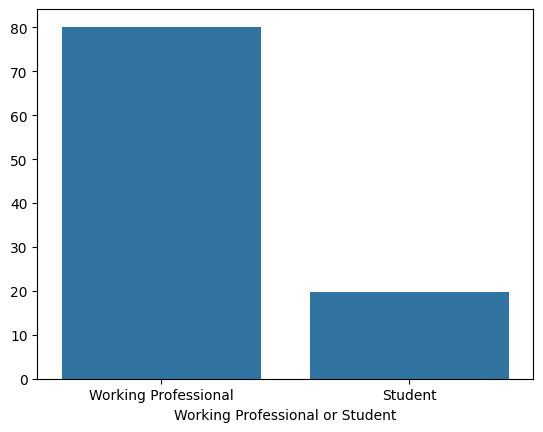

In [18]:

sns.barplot(x=df_percentage.index, y=df_percentage.values)

foreign data is due to the fact that some data are only for student or workers

# Depression

Depression
0    115133
1     25567
Name: count, dtype: int64


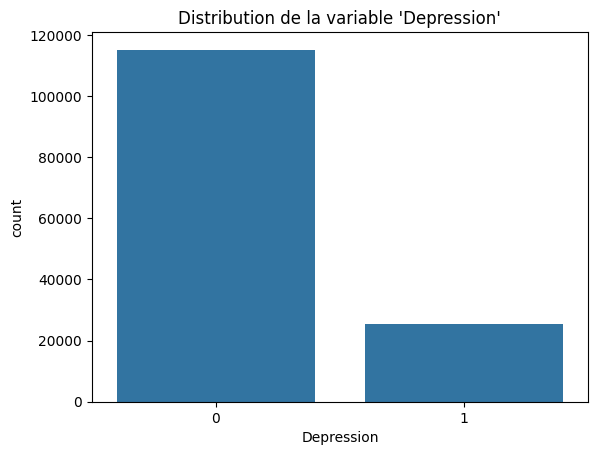

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Analyse de la variable cible
print(df['Depression'].value_counts())  # Distribution des classes
sns.countplot(x='Depression', data=df)
plt.title("Distribution de la variable 'Depression'")
plt.show()


# Corelation matrix

<Axes: >

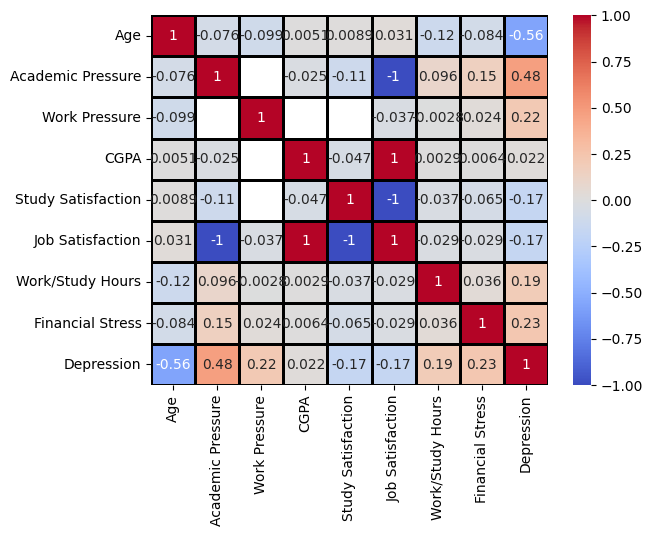

In [ ]:
df_num = df.select_dtypes(include=[np.number]).drop(columns=["id"])
correlation = df_num.corr()
sns.heatmap(correlation, annot=True , cmap='coolwarm' , linewidths=1 , linecolor='black')


In [ ]:
correlation

Age  Academic Pressure  Work Pressure      CGPA  \
Age                 1.000000          -0.075956      -0.098924  0.005129   
Academic Pressure  -0.075956           1.000000            NaN -0.025195   
Work Pressure      -0.098924                NaN       1.000000       NaN   
CGPA                0.005129          -0.025195            NaN  1.000000   
Study Satisfaction  0.008862          -0.112228            NaN -0.047078   
Job Satisfaction    0.030793          -1.000000      -0.036958  1.000000   
Work/Study Hours   -0.118356           0.095650      -0.002808  0.002875   
Financial Stress   -0.083589           0.152105       0.024412  0.006398   
Depression         -0.564671           0.475037       0.216634  0.021729   

                    Study Satisfaction  Job Satisfaction  Work/Study Hours  \
Age                           0.008862          0.030793         -0.118356   
Academic Pressure            -0.112228         -1.000000          0.095650   
Work Pressure                      NaN         -0.036958         -0.002808   
CGPA                         -0.047078          1.000000          0.002875   
Study Satisfaction            1.000000         -1.000000         -0.036934   
Job Satisfaction             -1.000000          1.000000         -0.029227   
Work/Study Hours             -0.036934         -0.029227          1.000000   
Financial Stress             -0.065001         -0.029160          0.036134   
Depression                   -0.168014         -0.168543          0.191746   

                    Financial Stress  Depression  
Age                        -0.083589   -0.564671  
Academic Pressure           0.152105    0.475037  
Work Pressure               0.024412    0.216634  
CGPA                        0.006398    0.021729  
Study Satisfaction         -0.065001   -0.168014  
Job Satisfaction           -0.029160   -0.168543  
Work/Study Hours            0.036134    0.191746  
Financial Stress            1.000000    0.227237  
Depression                  0.227237    1.000000

significant corrlation with depression :

- Age
- Academic pressure

# distribution


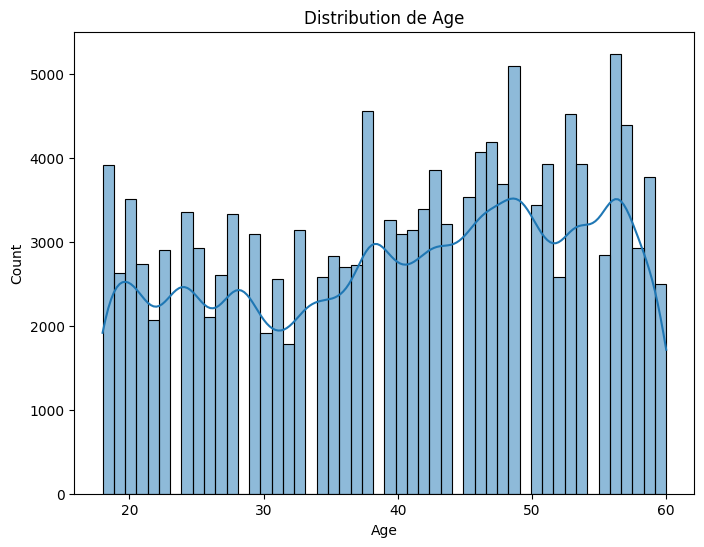

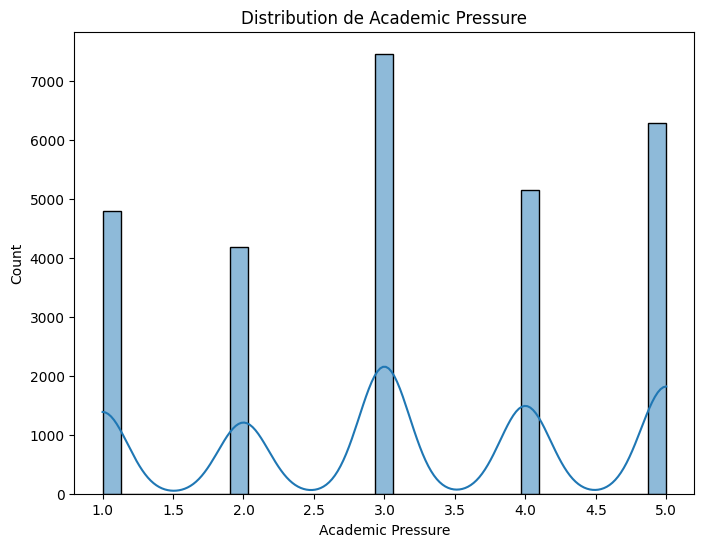

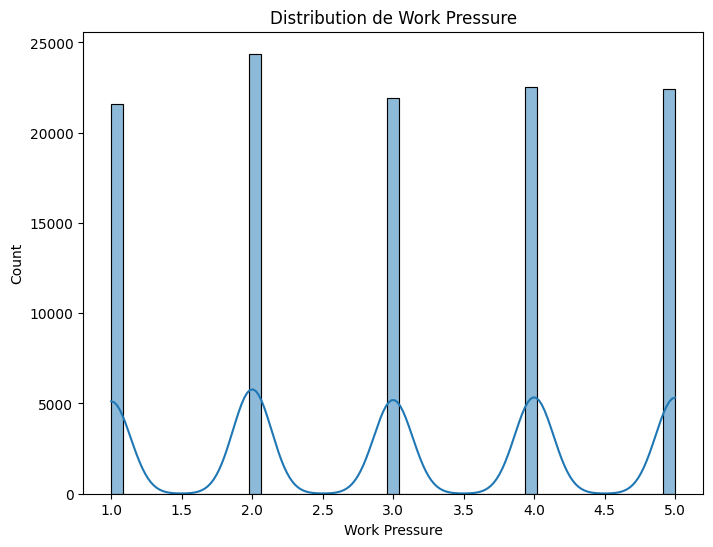

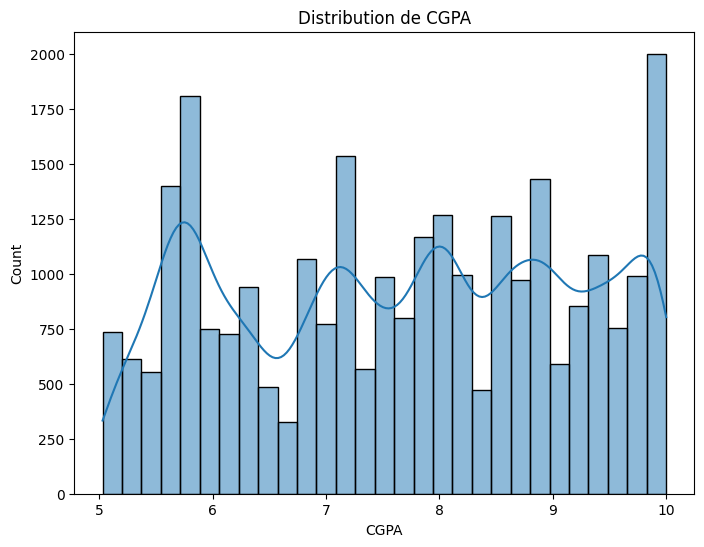

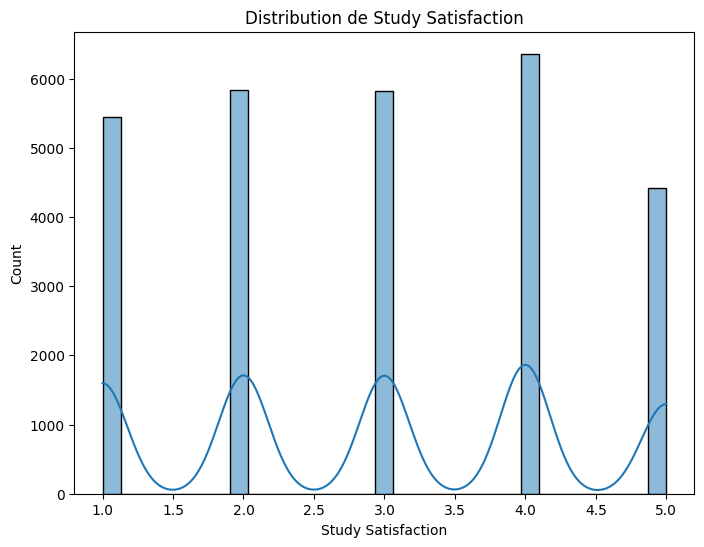

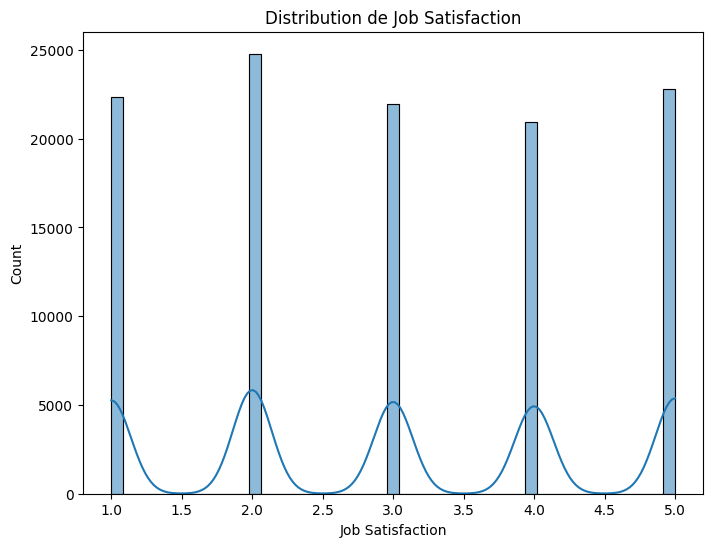

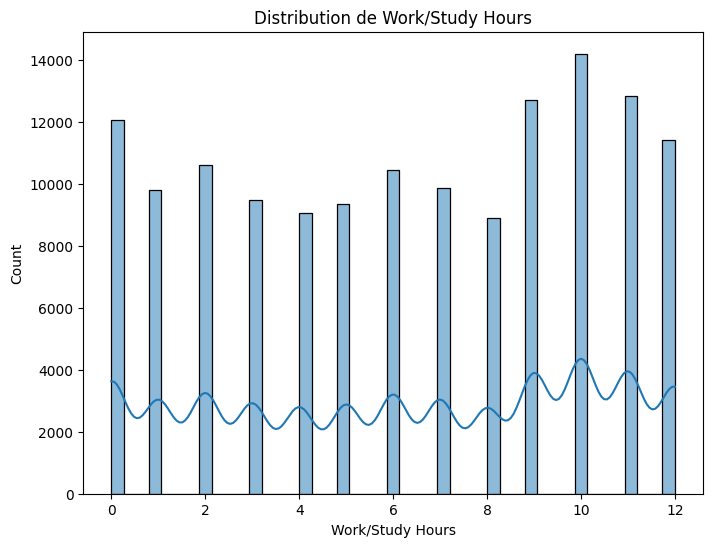

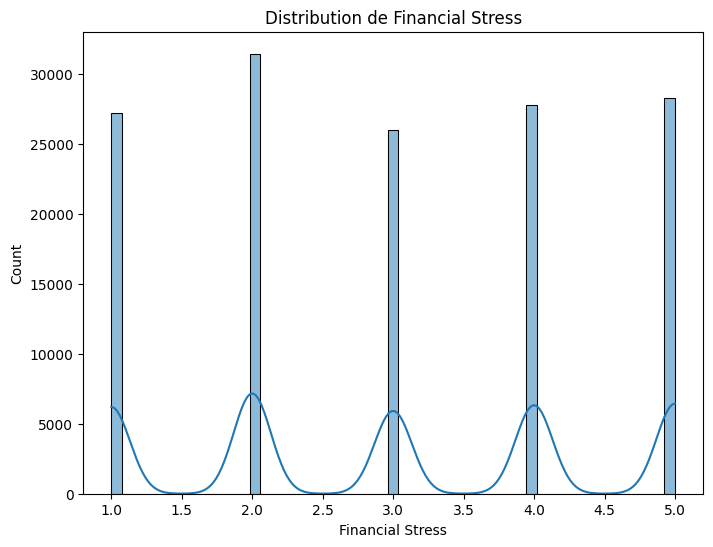

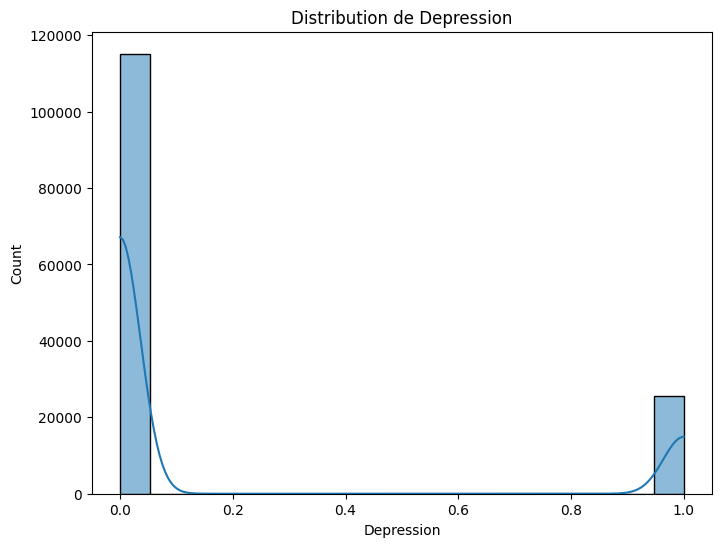

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_num[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


# Categorial Variable

In [42]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [43]:
df_cat = df.select_dtypes(exclude=[np.number])

In [61]:
df_num.shape, df.shape , df_cat.shape
# 19 because i drop target var

((140700, 9), (140700, 20), (140700, 10))

## unique values

In [62]:
for col in df_cat.columns:
    print(f"{col} : {df_cat[col].unique()}")

Name : ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 'Sanket' 'Tara' 'Gagan'
 'Anjali' 'Gaurav' 'Vikram' 'Yogesh' 'Ila' 'Rishi' 'Ayansh' 'Kolkat

In [63]:
df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

i think it will be hard to clean

In [64]:
from ydata_profiling import ProfileReport

In [65]:
report = ProfileReport(df)

In [66]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]